In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
import gc
from typing import List

In [2]:
save_plots = True

In [3]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + 's_comparison/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

# Import data

In [4]:
!ls ~/data/2D_recovery_studies/increased_covmatrix/

s_0.1  s_0.2  s_0.3  s_0.4  s_0.5  s_0.6  s_0.7  s_0.8	s_0.9  s_1


In [5]:
s_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1,
]

In [6]:
df_list = []

for s in s_values:
    io_folder = (
        str(pathlib.Path.home())
        + '/data/2D_recovery_studies/increased_covmatrix/s_'
        + str(s)
        + '/')
    input_file = io_folder + 'truthMatchedDaVinciLog.h5' 
    
    df_temp = pd.read_hdf(input_file, key='LHCbMC_Lb')
    df_temp['s'] = s
    df_temp['index_original'] = df_temp.index
    
    df_list.append(df_temp)
    
df_events = pd.concat(df_list)
df_events

try:
    del(df_list)
except NameError:
    pass

gc.collect()

0

In [7]:
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc,s,index_original
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030,0.1,0
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035,0.1,1
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041,0.1,2
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040,0.1,3
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,70.6920,1.017340e+03,1.018390e+03,346428.0,346658.0,346889.0,12,0.000034,0.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10377,0.000040,1.0,1041
1042,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10383,0.000044,1.0,1042
1043,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,32.7535,-1.153530e+03,-1.156850e+03,56049.1,56201.2,56353.8,10379,0.000032,1.0,1043
1044,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,62.7731,-3.803330e+03,-3.812820e+03,252021.0,252644.0,253269.0,10385,0.000036,1.0,1044


# Comparisons

In [8]:
def moving_s_plot(
    s_array: List[float],
    dictionary: dict,
    feature: str,
    y_axis_label: str,
    title: str
) -> None:
    
    values = [dictionary[s][feature] for s in s_array]

    plt.plot(s_array, values, linestyle='--', marker='+', color='tab:blue')
    plt.xlabel("$s$")
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.grid()
    
    if save_plots:
        plt.savefig(plots_dir + feature + '.pdf', bbox_inches='tight')
    
    plt.show()

In [9]:
s_values_dictionary = {}

for s in s_values:
    if s not in s_values_dictionary:
        s_values_dictionary[s] = {}

s_values_dictionary

{0.1: {},
 0.2: {},
 0.3: {},
 0.4: {},
 0.5: {},
 0.6: {},
 0.7: {},
 0.8: {},
 0.9: {},
 1: {}}

## $\Lambda^0$ decay vertex bias

In [10]:
for s in s_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    for comp in ['x', 'y', 'z']:
        fit_vtx = 'L_ENDVERTEX_' + comp.upper()
        true_vtx = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()
        
        ## Bias mean
        s_values_dictionary[s]['L_vtx_bias_' + comp + '_mean'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).mean()
        
        ## Bias mean
        s_values_dictionary[s]['L_vtx_bias_' + comp + '_median'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).median()
        
        ## Bias standard deviation
        s_values_dictionary[s]['L_vtx_bias_' + comp + '_std'] = (
            df_events.loc[selected_events, fit_vtx] - df_events.loc[selected_events, true_vtx]
        ).std()

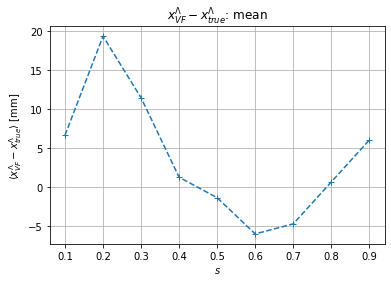

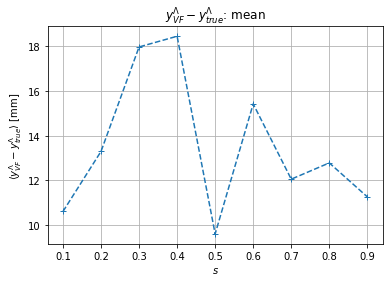

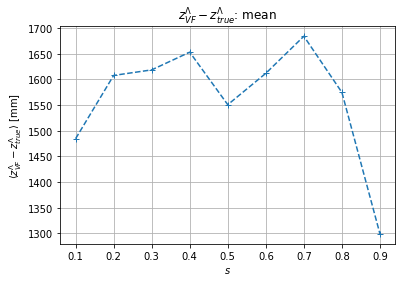

In [11]:
for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_mean'
    title = "$" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true}$: mean"
    ylabel = "$\langle " + component + "^\Lambda_{VF} - " + component + r"^\Lambda_{true} \rangle$ [mm]"
    moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

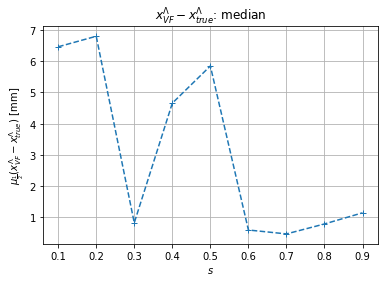

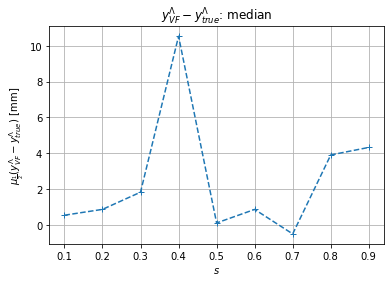

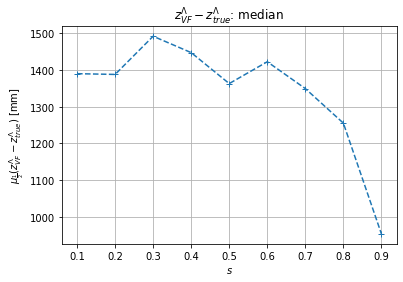

In [12]:
for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_median'
    title = "$" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true}$: median"
    ylabel = r"$\mu_\frac{1}{2} (" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true})$ [mm]"
    moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

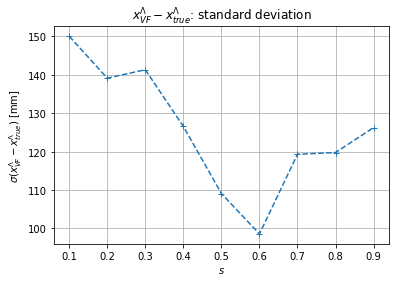

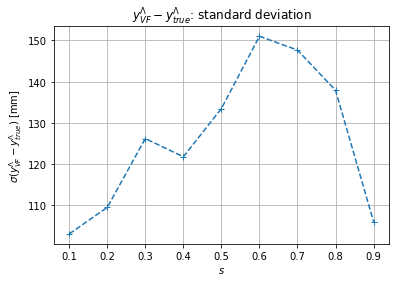

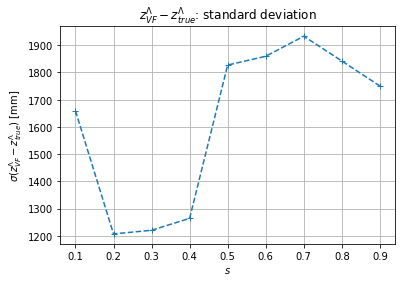

In [13]:
for component in ['x', 'y', 'z']:
    feature_to_plot = 'L_vtx_bias_' + component + '_std'
    title = "$" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true}$: standard deviation"
    ylabel = "$\sigma(" + component + "^\Lambda_{VF} - " + component + "^\Lambda_{true})$ [mm]"
    moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

## Total number of 2D-converged events

In [14]:
for s in s_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    s_values_dictionary[s]['Converged2D_total'] = sum(selected_events)

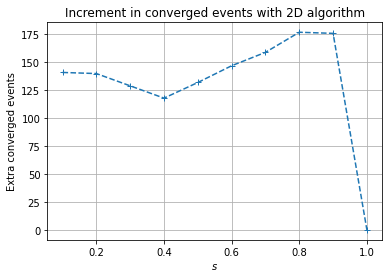

In [15]:
feature_to_plot = 'Converged2D_total'
title = 'Increment in converged events with 2D algorithm'
ylabel = "Extra converged events"
moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

## Reduced $\chi^2_\Lambda$

In [16]:
for s in s_values:
    selected_events = (
        (df_events['s'] == s)
        & (df_events['status_2D'] == 'Converged2D')
    )
    
    ## Chi2 mean
    s_values_dictionary[s]['Lambda_reduced_chi2_mean'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].mean()
    
    ## Chi2 median
    s_values_dictionary[s]['Lambda_reduced_chi2_median'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].median()
    
    ## Chi2 std
    s_values_dictionary[s]['Lambda_reduced_chi2_std'] = df_events.loc[selected_events, 'L_VFASPF_CHI2_VDOF'].std()

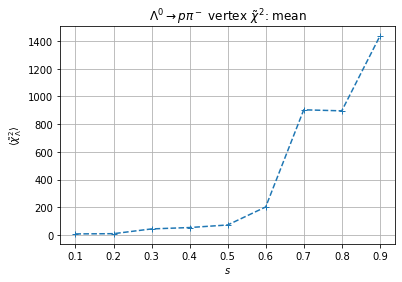

In [17]:
feature_to_plot = 'Lambda_reduced_chi2_mean'
title = r'$\Lambda^0 \rightarrow p\pi^-$ vertex $\tilde\chi^2$: mean'
ylabel = r"$\langle \tilde\chi^2_\Lambda \rangle$"
moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

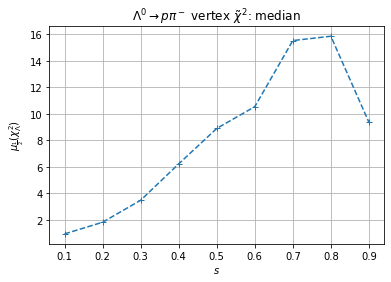

In [18]:
feature_to_plot = 'Lambda_reduced_chi2_median'
title = r'$\Lambda^0 \rightarrow p\pi^-$ vertex $\tilde\chi^2$: median'
ylabel = r"$\mu_\frac{1}{2} (\chi^2_\Lambda)$"
moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)

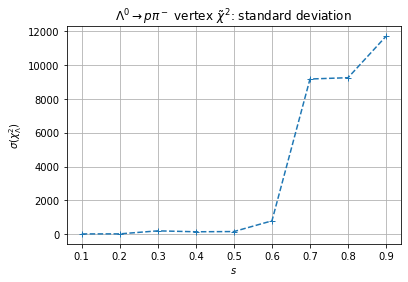

In [19]:
feature_to_plot = 'Lambda_reduced_chi2_std'
title = r'$\Lambda^0 \rightarrow p\pi^-$ vertex $\tilde\chi^2$: standard deviation'
ylabel = "$\sigma(\chi^2_\Lambda)$"
moving_s_plot(list(s_values_dictionary), s_values_dictionary, feature_to_plot, ylabel, title)